# Analyzing Birmingham Parking data
http://archive.ics.uci.edu/ml/datasets/Parking+Birmingham#

## Initialization

In [1]:
import pandas as pd
from pandas import Grouper
import seaborn as sns

In [2]:
train=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip',
                 compression='zip')
#train.head()

In [3]:
train.describe()

,Capacity,Occupancy
count,35717.000000,35717.000000
mean,1397.550130,642.228911
std,1179.326833,656.955535
min,220.000000,-8.000000
25%,500.000000,210.000000
50%,849.000000,446.000000
75%,2009.000000,798.000000
max,4675.000000,4327.000000


## Data cleaning

In [27]:
train=train.rename(str.lower, axis='columns')
train.lastupdated = pd.to_datetime(train.lastupdated, infer_datetime_format=True)
#train.dtypes
train['systemcodenumber']=train.systemcodenumber.str.strip()

## Visualizing data

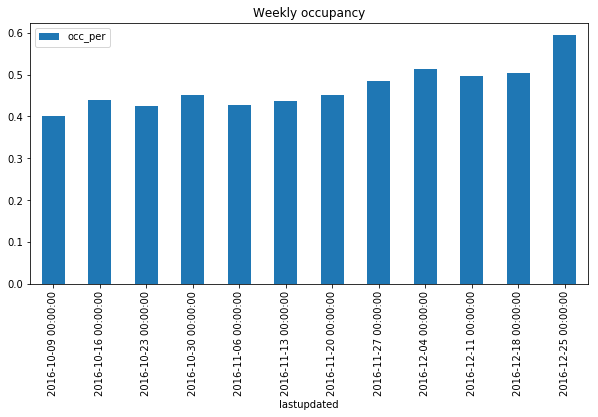

In [19]:
weekly=train.groupby(Grouper(key='lastupdated', freq='W')).sum()
weekly['occ_per'] = weekly.occupancy / weekly.capacity
weekly.plot.bar(y='occ_per', figsize=(10,4.8), title='Weekly occupancy')

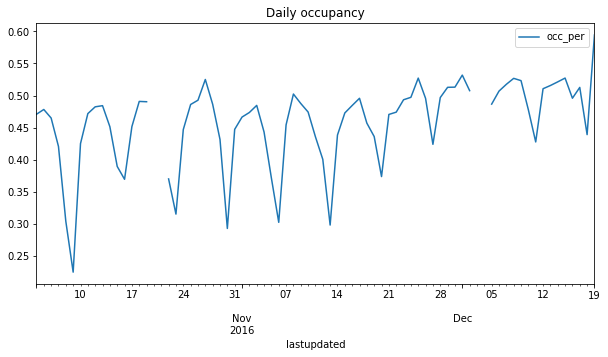

In [20]:
daily=train.groupby(Grouper(key='lastupdated', freq='D')).sum()
daily['occ_per'] = daily.occupancy / daily.capacity
daily.plot.line(y='occ_per', figsize=(10,4.8), title='Daily occupancy')

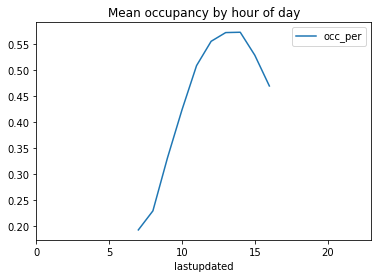

In [21]:
hourly=train.groupby(Grouper(key='lastupdated', freq='H')).sum()

hourly=hourly.groupby(hourly.index.hour).mean()
hourly['occ_per'] = hourly.occupancy / hourly.capacity
hourly.dropna()

hourly.plot.line(y='occ_per', title='Mean occupancy by hour of day')

In [22]:
def isoweekday(x):
    return x.isoweekday()
#print(train.lastupdated.apply(isoweekday).head())

weekdays=train[train.lastupdated.apply(isoweekday) < 6]
#weekdays.head()
#weekly.nlargest(10, 'occ_per')

## Feature engineering

In [23]:
parks=pd.DataFrame(columns=['systemcodenumber', 'capacity'])
parks['systemcodenumber'] = train.systemcodenumber.unique()
parks['capacity'] = train.capacity.unique()
parks.nlargest(5, 'capacity', keep='all')

,systemcodenumber,capacity
24,Others-CCCPS133,4675
25,Others-CCCPS135a,3883
28,Others-CCCPS98,3103
18,Bull Ring,3053
26,Others-CCCPS202,2937


In [36]:
largestpark=parks.nlargest(1, 'capacity').systemcodenumber.to_string(index=False).strip()
#largestpark
lpdata=train[train['systemcodenumber'] == largestpark]

,systemcodenumber,capacity,occupancy,lastupdated
27863,Others-CCCPS133,4675,804,2016-10-04 07:59:42
27864,Others-CCCPS133,4675,911,2016-10-04 08:25:42
27865,Others-CCCPS133,4675,1065,2016-10-04 08:59:42
27866,Others-CCCPS133,4675,1236,2016-10-04 09:32:46
27867,Others-CCCPS133,4675,1503,2016-10-04 09:59:48
